In [1]:
from transformers import pipeline
import pandas as pd

f:\software\Anaconda\envs\ai-python\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
df = pd.read_csv("2025-08-26_news.csv")
df = df.drop_duplicates()
classifier = pipeline("sentiment-analysis", model="uer/roberta-base-finetuned-jd-binary-chinese")
def predict_sentiment(text):
    try: 
        result = classifier(text[:512])[0]
        # print(result[0]["label"])
        return result["label"],result["score"] 
    except:
        return None,None
df["情感"],df["置信度"] = zip(*df["摘要"].map(predict_sentiment))
df.to_csv("news_with_sentiment.csv",index=False,encoding='utf-8-sig')            


Device set to use cpu


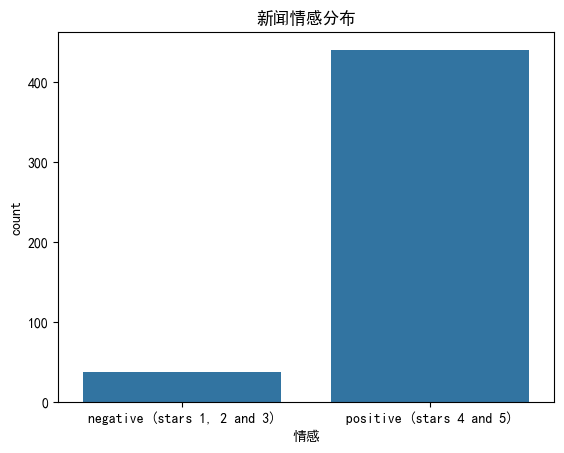

In [11]:
import seaborn as sns
import matplotlib.pyplot as  plt
sns.countplot(x="情感",data=df)
plt.title("新闻情感分布")
plt.savefig("sentiment_distribution.png")